In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA



## Load data

In [2]:
X,y = load_diabetes(return_X_y=True, as_frame=True, scaled=False)
all_attributes = pd.concat([X,y], axis=1)
sex = X['sex'].copy()
sex = sex.replace({1: 'male', 2: 'female'})
all_attributes.rename(columns={'s1':'tc', 's2': 'ldl', 's3': 'hdl', 's4': 'tch', 's5': 'ltg', 's6': 'glu'}, inplace=True)
all_attributes.to_csv('cleaned_data.csv', index=False)

## Data cleaning

### Null and dtypes

In [3]:
# Checking null values
print(all_attributes.isnull().sum())
print()
print(all_attributes.dtypes)

age       0
sex       0
bmi       0
bp        0
tc        0
ldl       0
hdl       0
tch       0
ltg       0
glu       0
target    0
dtype: int64

age       float64
sex       float64
bmi       float64
bp        float64
tc        float64
ldl       float64
hdl       float64
tch       float64
ltg       float64
glu       float64
target    float64
dtype: object


In [4]:
# Summeray statistics
all_attributes.describe().round(2)

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,48.52,1.47,26.38,94.65,189.14,115.44,49.79,4.07,4.64,91.26,152.13
std,13.11,0.50,4.42,13.83,34.61,30.41,12.93,1.29,0.52,11.50,77.09
min,19.00,1.00,18.00,62.00,97.00,41.60,22.00,2.00,3.26,58.00,25.00
25%,38.25,1.00,23.20,84.00,164.25,96.05,40.25,3.00,4.28,83.25,87.00
50%,50.00,1.00,25.70,93.00,186.00,113.00,48.00,4.00,4.62,91.00,140.50
75%,59.00,2.00,29.28,105.00,209.75,134.50,57.75,5.00,5.00,98.00,211.50
max,79.00,2.00,42.20,133.00,301.00,242.40,99.00,9.09,6.11,124.00,346.00


In [5]:
all_attributes.groupby('sex').size()

sex
1.0    235
2.0    207
dtype: int64

### Distributions

In [6]:
selected_attributes = all_attributes.drop(['sex', 'target'], axis=1)
selected_attributes['tch'] = selected_attributes['tc'] / selected_attributes['hdl']


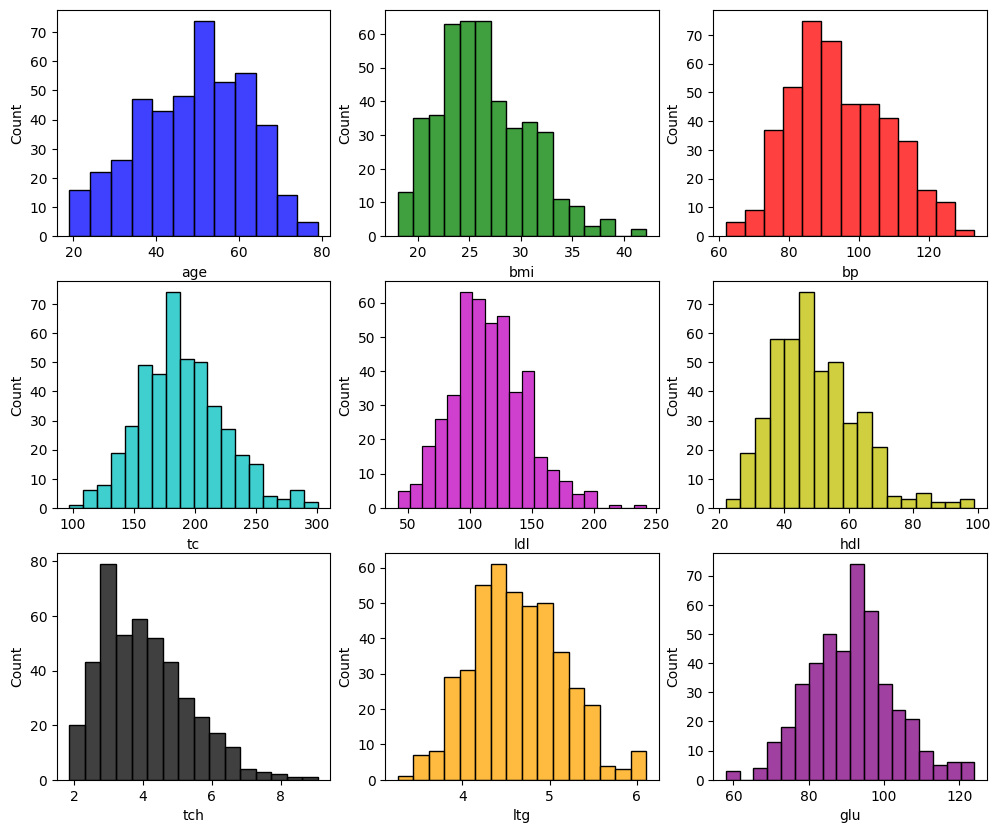

In [7]:
# Display distributions
# Define a list of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple']

fig, axs = plt.subplots(3, 3, figsize=(12, 10))  
axs = axs.flatten()  

# Remove sex
all_attributes

for i, c in enumerate(selected_attributes.columns):
    sns.histplot(selected_attributes[c], ax=axs[i], color=colors[i])  



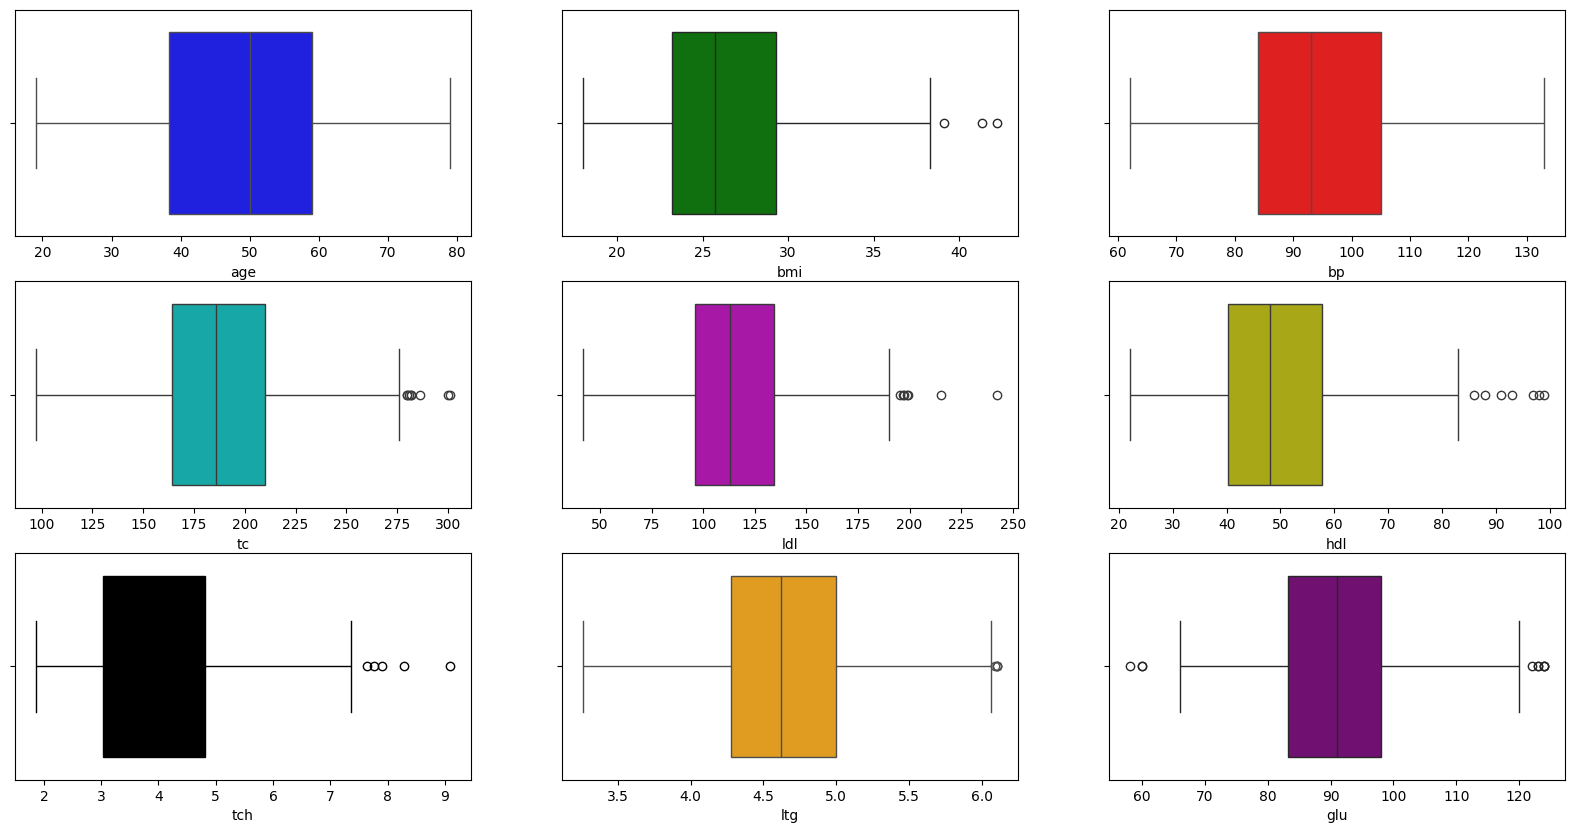

In [8]:
# ax = sns.stripplot(data = all_attributes, jitter=True)
# ax.grid(True)

fig, axs = plt.subplots(3, 3, figsize=(20, 10))  

axs = axs.flatten()  
for i, c in enumerate(selected_attributes.columns):
    sns.boxplot(selected_attributes[c], ax=axs[i], color=colors[i], legend=False, orient='h')  
    # axs[i].set_title(c)
    # # axs[i].set_title(c)
    # axs[i].set_xlabel('')
    # axs[i].set_ylabel('') 

### Correlation

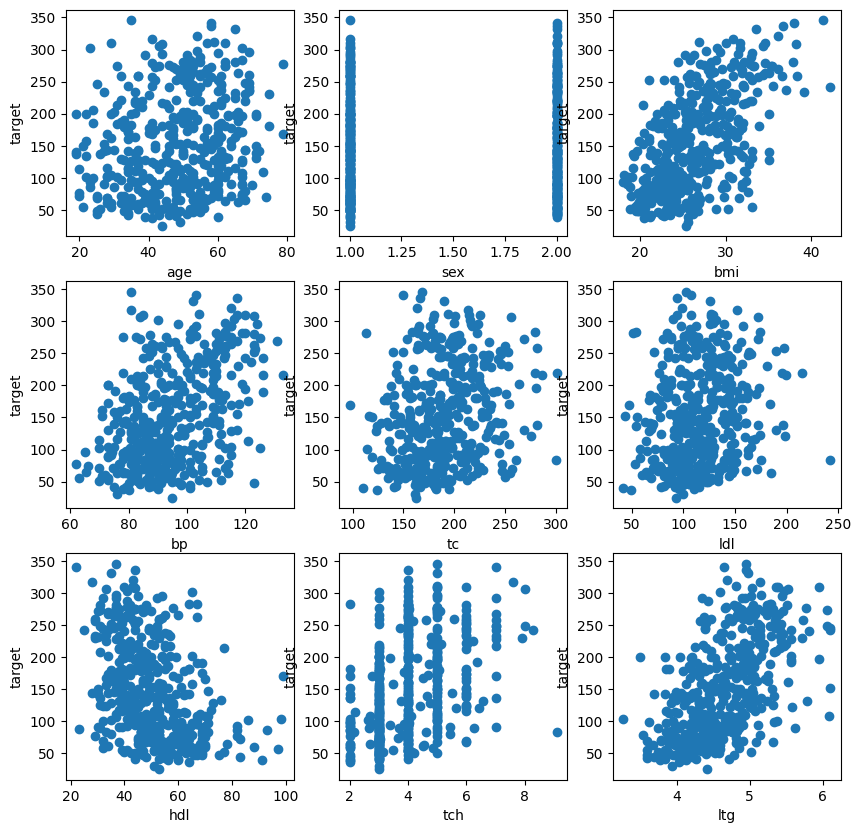

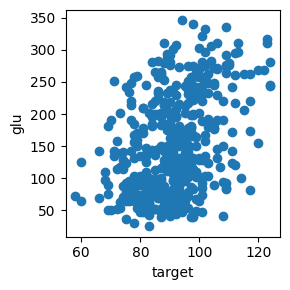

In [9]:
# Plotting against target
fig, axs = plt.subplots(3, 3, figsize=(10, 10))  # Create a 3x3 grid of subplots
axs = axs.flatten()  # Flatten the array of axes

for i, c in enumerate(all_attributes.columns[:9]):  # Loop over the first 9 columns
    if c != 'target':
        axs[i].scatter(x = all_attributes[c], y = all_attributes['target'])
        axs[i].set_xlabel(c)
        axs[i].set_ylabel('target')

# Plot the data for the last column on a new figure
fig2, ax2 = plt.subplots(figsize=(3, 3))
ax2.scatter(x = all_attributes[all_attributes.columns[-2]], y = all_attributes['target'])
ax2.set_xlabel(all_attributes.columns[-1])
ax2.set_ylabel('glu')
                                                                            
plt.tight_layout()
plt.show()

In [10]:
all_attributes.corr()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
tc,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
ldl,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
hdl,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
tch,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
ltg,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
glu,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [11]:
((X - X.mean()) / X.std())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.799594,1.064282,1.295620,0.459320,-0.928693,-0.731236,-0.911418,-0.054438,0.418057,-0.370569
1,-0.039522,-0.937474,-1.080955,-0.552878,-0.177423,-0.402430,1.562643,-0.829361,-1.434962,-1.936285
2,1.791277,1.064282,0.933475,-0.119079,-0.957588,-0.718084,-0.679475,-0.054438,0.060087,-0.544537
3,-1.870322,-0.937474,-0.243495,-0.769778,0.256002,0.524802,-0.756789,0.720486,0.476443,-0.196600
4,0.113044,-0.937474,-0.764079,0.459320,0.082632,0.327519,0.170984,-0.054438,-0.671740,-0.979458
...,...,...,...,...,...,...,...,...,...,...
437,0.875877,1.064282,0.412892,1.254619,-0.119633,-0.053896,-0.602160,-0.054438,0.655045,0.151337
438,-0.115806,1.064282,-0.334032,-1.420477,1.036167,1.662471,-0.602160,0.720486,-0.380388,0.934195
439,0.875877,1.064282,-0.334032,0.363161,-0.784218,-0.290636,-0.524846,-0.232670,-0.984533,0.325305
440,-0.954922,-0.937474,0.820305,0.025521,0.342687,0.320943,-0.602160,0.557752,0.935103,-0.544537


<Axes: >

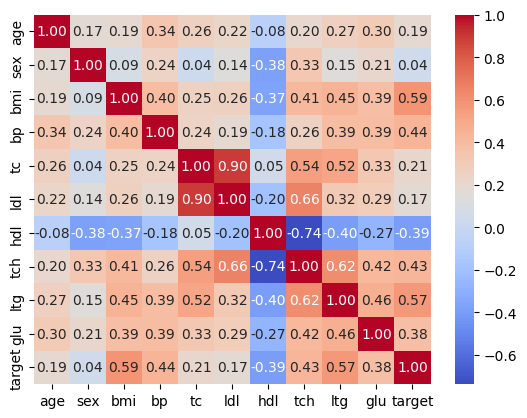

In [12]:
# calculate the correlation matrix on the numeric columns
corr = all_attributes.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

## PCA

In [13]:
# exercise 2.1.1
import importlib_resources
import numpy as np
import xlrd
import pandas as pd
# Load xls sheet with data
filename = importlib_resources.files("dtuimldmtools").joinpath("data/nanonose.xls")
doc = xlrd.open_workbook(filename).sheet_by_index(0)

# Extract class names to python list,
# then encode with integers (dict)
classNames = sorted(set(sex))
classDict = dict(zip(classNames, range(5)))

# Extract vector y, convert to NumPy array
y = np.array(X['sex'].astype(int))

# Preallocate memory, then extract excel data to matrix X
# if 'sex' in X: X = X.drop(columns=['sex'])

# Extract attribute names (1st row, column 4 to 12)
attributeNames = all_attributes.columns
attributeNames = attributeNames.drop(['target'])

# Compute values of N, M and C.
N = len(y)
M = len(attributeNames)
C = len(classNames)


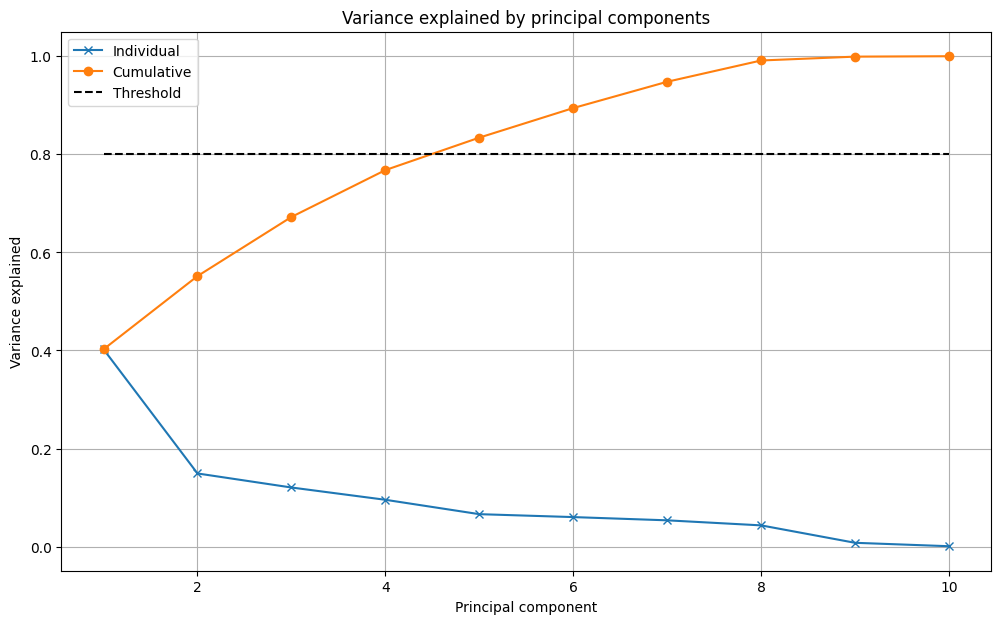

(array([[-0.01392303, -0.07580301,  0.02552043, ..., -0.0547074 ,
         -0.03077598,  0.02516585],
        [ 0.06714046,  0.05342419,  0.00120973, ...,  0.0136103 ,
          0.08585268, -0.02241332],
        [-0.00645242, -0.06365748,  0.03201909, ..., -0.06090252,
         -0.00430909,  0.02785055],
        ...,
        [ 0.00486563, -0.04693756,  0.02149146, ...,  0.03552506,
         -0.01924321, -0.03026656],
        [-0.01642862,  0.00818163, -0.03762731, ..., -0.00568313,
         -0.02162114,  0.02341141],
        [ 0.0451442 ,  0.15480319, -0.00209367, ..., -0.08561566,
          0.12415309,  0.07945552]]),
 array([42.12691468, 25.65371275, 23.06146397, 20.52717939, 17.08865102,
        16.30331961, 15.38263478, 13.82945328,  5.87700015,  1.94300845]),
 array([[-0.2164309 , -0.18696688, -0.30316216, -0.27173773, -0.34325511,
         -0.35186068,  0.28243681, -0.4288337 , -0.37861802, -0.32218296],
        [ 0.04436721, -0.3865472 , -0.15628128, -0.138266  ,  0.57302691,
  

In [19]:
# exercise 2.1.3
# (requires data structures from ex. 2.2.1)
import matplotlib.pyplot as plt
from scipy.linalg import svd

ys = np.array((X - X.mean())/X.std())

# PCA by computing SVD of Y
U, S, V = svd(ys, full_matrices=False)

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()

threshold = 0.80

# Plot variance explained
plt.figure(figsize=(12,7))
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()
U, S, V

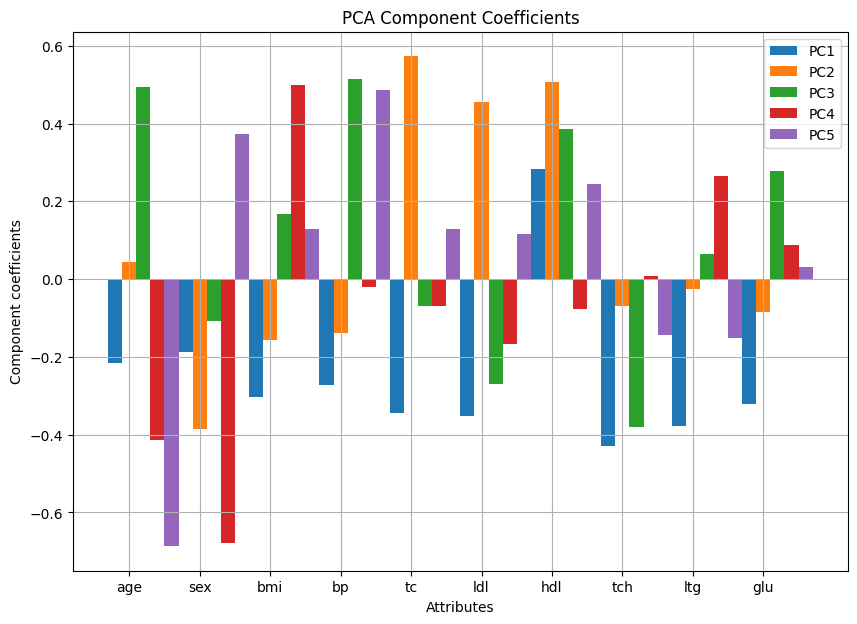

PC1:
[-0.2164309  -0.18696688 -0.30316216 -0.27173773 -0.34325511 -0.35186068
  0.28243681 -0.4288337  -0.37861802 -0.32218296]


In [15]:
# exercise 2.2.4

# (requires data structures from ex. 2.2.1)
import matplotlib.pyplot as plt
from scipy.linalg import svd


U, S, Vh = svd(ys, full_matrices=False)
V = Vh.T
N, M = X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = range(5)
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.2
r = np.arange(1, M + 1)
plt.figure(figsize=(10, 7))
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)
plt.xticks(r + bw, attributeNames)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs, loc='upper right')
plt.grid()
plt.title("PCA Component Coefficients")
plt.show()

# Inspecting the plot, we see that the 2nd principal component has large
# (in magnitude) coefficients for attributes A, E and H. We can confirm
# this by looking at it's numerical values directly, too:
print("PC1:")
print(V[:, 0].T)

# How does this translate to the actual data and its projections?
# Looking at the data for water:

# # Projection of water class onto the 2nd principal component.
# all_water_data = ys[y == 'bmi', :]

# print("First water observation")
# print(all_water_data[0, :])

# Based on the coefficients and the attribute values for the observation
# displayed, would you expect the projection onto PC2 to be positive or
# negative - why? Consider *both* the magnitude and sign of *both* the
# coefficient and the attribute!

# You can determine the projection by (remove comments):
# print("...and its projection onto PC2")
# print(all_water_data[0, :] @ V[:, 1])
# Try to explain why?



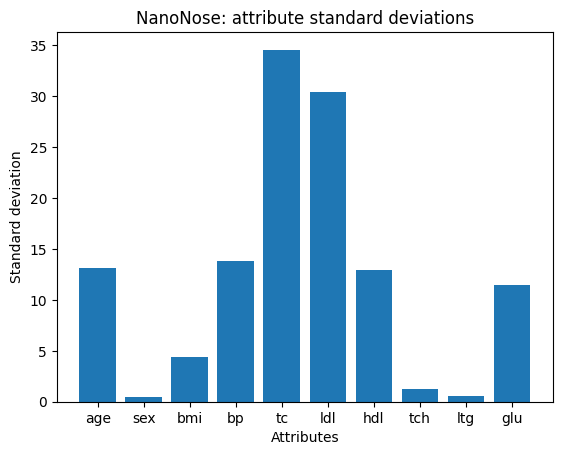

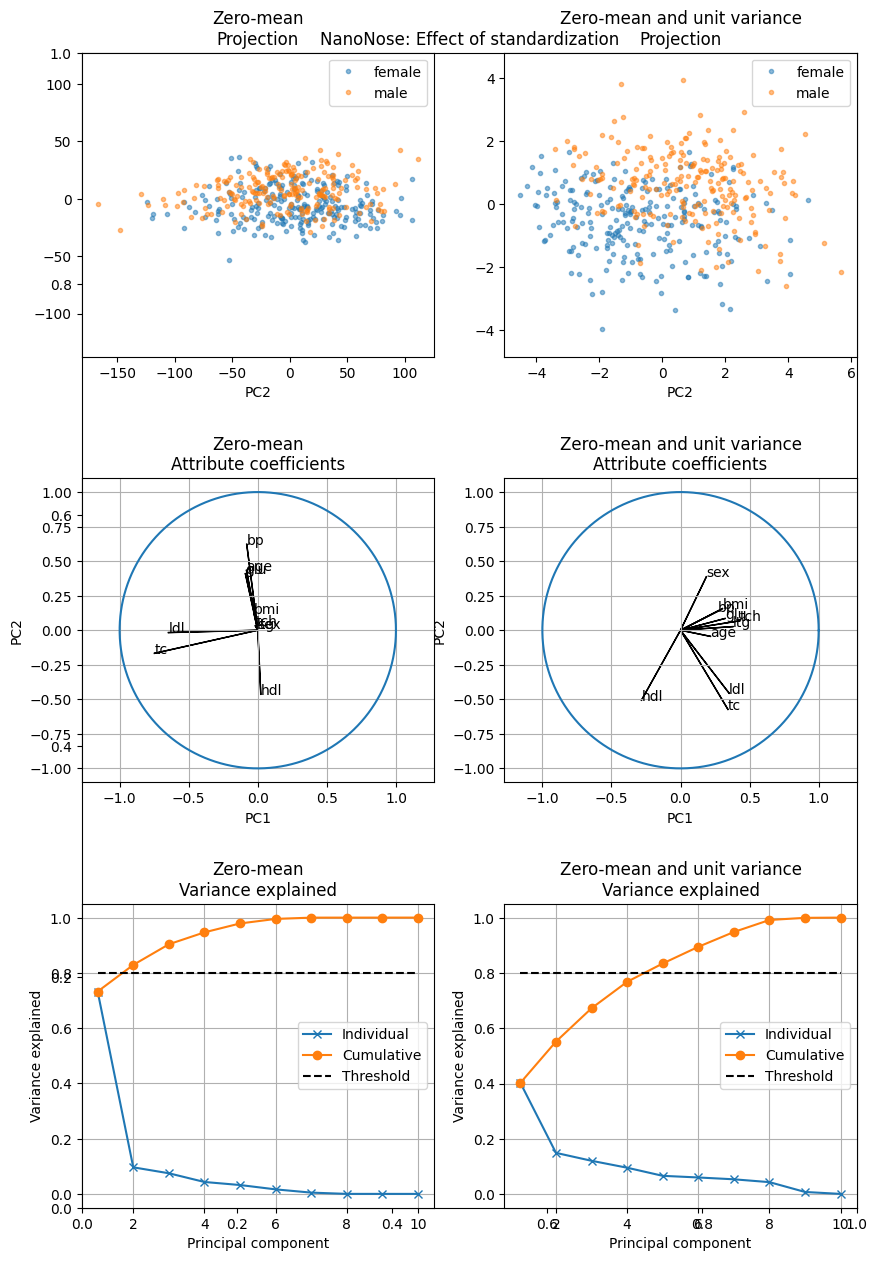

In [16]:
## exercise 2.1.6
import matplotlib.pyplot as plt
from scipy.linalg import svd

r = np.arange(1, X.shape[1] + 1)
plt.bar(r, np.std(X, 0))
plt.xticks(r, attributeNames)
plt.ylabel("Standard deviation")
plt.xlabel("Attributes")
plt.title("NanoNose: attribute standard deviations")

## Investigate how standardization affects PCA

# Try this *later* (for last), and explain the effect
# X_s = X.copy() # Make a to be "scaled" version of X
# X_s[:, 2] = 100*X_s[:, 2] # Scale/multiply attribute C with a factor 100
# Use X_s instead of X to in the script below to see the difference.
# Does it affect the two columns in the plot equally?


# # Subtract the mean from the data
# Y1 = X - np.ones((N, 1)) * X.mean(0)
Y1 = np.array(X - X.mean())

# # Subtract the mean from the data and divide by the attribute standard
# # deviation to obtain a standardized dataset:
# Y2 = X - np.ones((N, 1)) * X.mean(0)
# Y2 = Y2 * (1 / np.std(Y2, 0))
Y2 = np.array((X - X.mean())/X.std())
# Here were utilizing the broadcasting of a row vector to fit the dimensions
# of Y2

# Store the two in a cell, so we can just loop over them:
Ys = [Y1, Y2]
titles = ["Zero-mean", "Zero-mean and unit variance"]
threshold = 0.8
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.4)
plt.title("NanoNose: Effect of standardization")
nrows = 3
ncols = 2
for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U, S, Vh = svd(Ys[k], full_matrices=False)
    V = Vh.T  # For the direction of V to fit the convention in the course we transpose
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    if k == 1:
        V = -V
        U = -U

    # Compute variance explained
    rho = (S * S) / (S * S).sum()

    # Compute the projection onto the principal components
    Z = U * S

    # Plot projection
    plt.subplot(nrows, ncols, 1 + k)
    C = len(classNames)
    for c in range(1, C+1):
        plt.plot(Z[y == c, i], Z[y == c, j], ".", alpha=0.5)
    plt.xlabel("PC" + str(i + 1))
    plt.xlabel("PC" + str(j + 1))
    plt.title(titles[k] + "\n" + "Projection")
    plt.legend(classNames)
    plt.axis("equal")

    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols, 3 + k)
    for att in range(V.shape[1]):
        plt.arrow(0, 0, V[att, i], V[att, j])
        plt.text(V[att, i], V[att, j], attributeNames[att])
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel("PC" + str(i + 1))
    plt.ylabel("PC" + str(j + 1))
    plt.grid()
    # Add a unit circle
    plt.plot(
        np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01))
    )
    plt.title(titles[k] + "\n" + "Attribute coefficients")
    plt.axis("equal")

    # Plot cumulative variance explained
    plt.subplot(nrows, ncols, 5 + k)
    plt.plot(range(1, len(rho) + 1), rho, "x-")
    plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
    plt.plot([1, len(rho)], [threshold, threshold], "k--")
    plt.title("Variance explained by principal components")
    plt.xlabel("Principal component")
    plt.ylabel("Variance explained")
    plt.legend(["Individual", "Cumulative", "Threshold"])
    plt.grid()
    plt.title(titles[k] + "\n" + "Variance explained")

plt.show()


In [17]:
# Define data 
all_attributes = (all_attributes - all_attributes.mean()) / all_attributes.std()
df = all_attributes.iloc[:, :-1]
target = all_attributes['target']

pca2d = PCA(n_components=2)
projections = pca2d.fit_transform(df)

x = [c[0] for c in projections]
y = [c[1] for c in projections]


loadings = pd.DataFrame(pca2d.components_.T, columns=[f'PC{i+1}' for i in range(pca2d.components_.T.shape[1])], index=df.columns)
print(loadings)

          PC1       PC2
age  0.216431  0.044367
sex  0.186967 -0.386547
bmi  0.303162 -0.156281
bp   0.271738 -0.138266
tc   0.343255  0.573027
ldl  0.351861  0.455942
hdl -0.282437  0.506239
tch  0.428834 -0.068181
ltg  0.378618 -0.026187
glu  0.322183 -0.084949


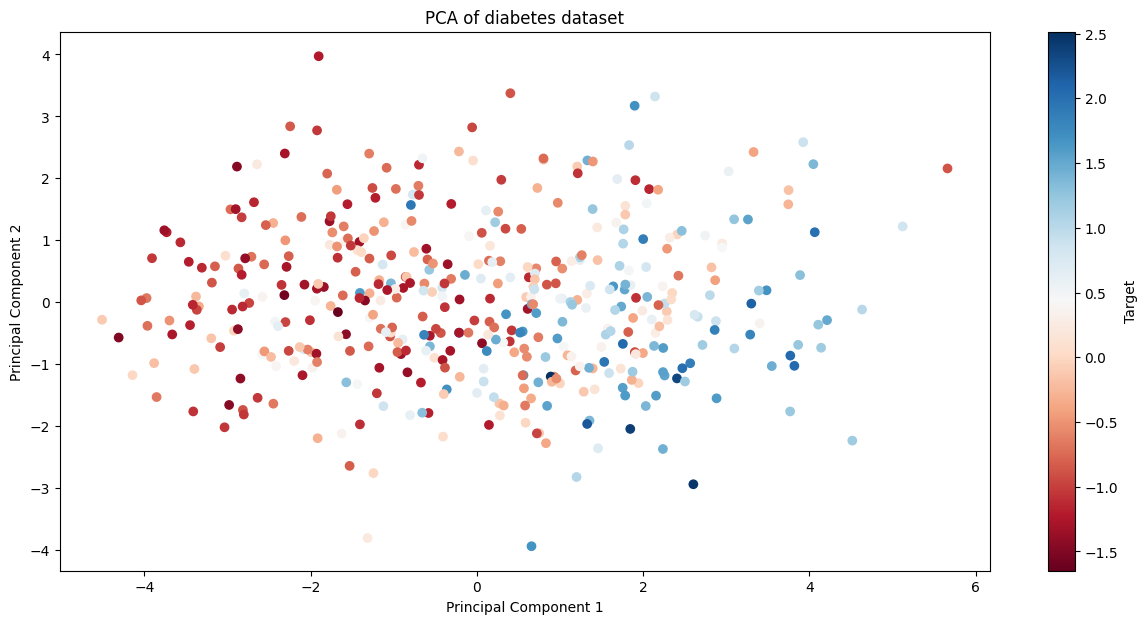

In [18]:
# Plotting projections
plt.figure(figsize=(15,7))
scatter = plt.scatter(x, y, c=target, cmap='RdBu')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of diabetes dataset')

# Add a colorbar
plt.colorbar(scatter, label='Target')

plt.show()